# Extracting The Country From The I.P Adress

Before we can do any data analysis and model creation, let us add a new column called 'country' in the fraud data table that indicates from which country did the user purchase the item. We can do this by using the ip_address table, i.e if an I.P address falls within a certain range, then we can find the country of origin.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from datetime import datetime, time
import time

In [2]:
fraud_data = pd.read_csv("Fraud_Data.csv")
ip_address_to_country = pd.read_csv("IpAddress_to_Country.csv")

display(fraud_data.head(5))
display(ip_address_to_country.head(5))

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [3]:
def ip_to_country(ip_address):
    lower_bound = ip_address_to_country['lower_bound_ip_address'] <= ip_address
    upper_bound = ip_address_to_country['upper_bound_ip_address'] >= ip_address
    
    if len(ip_address_to_country[lower_bound & upper_bound]['country'].values) > 0:
        return ip_address_to_country[lower_bound & upper_bound]['country'].values[0]
    else:
        return 'None'

In [4]:
start_time = time.time()
fraud_data['country'] = np.vectorize(ip_to_country)(fraud_data['ip_address'])
print("Time taken to complete process (seconds): %s" % (time.time() - start_time))

Time taken to complete process (seconds): 496.68095898628235


In [5]:
fraud_data.drop(columns = ['ip_address'], inplace = True)
fraud_data.head(15)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,0,None
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,0,United States


In [6]:
#Save the fraud data with country column
fraud_data.to_csv("Fraud_Data_With_Country.csv")

To save a bit of time, there is a file called fraud_data_with_country that is the result of running the above cells. If it takes too long to find the country from the ip address for 151,000 rows, simply run the cell below.

In [7]:
#If fraud_data_with_country.csv file exists simply load it into a dataframe
fraud_data = pd.read_csv("Fraud_Data_With_Country.csv", index_col = 0)

# Exploratory Data Analysis

In [8]:
print("Number of Rows: \t\t" + str(len(fraud_data)))
print("Number of Unique User IDs: \t" + str(len(fraud_data.index.unique())))
print("Number of Unique Device IDs: \t" + str(len(fraud_data['device_id'].unique())))

Number of Rows: 		151112
Number of Unique User IDs: 	151112
Number of Unique Device IDs: 	137956


Based on the above table, we can conclude that there exists at least one device that is used by multiple users. If there are multiple users that try to make a transaction from the same device, then the transaction might be fraudulent. Let's take a sample of  the devices where there were used by more than 2 users.

In [9]:
device_ids = (fraud_data.groupby('device_id')['user_id'].count() > 1)
duplicated_device_ids = np.array(device_ids[device_ids == True].index)
np.random.shuffle(duplicated_device_ids)

for device_id in duplicated_device_ids[0:10]:
    if len(fraud_data[fraud_data['device_id'] == device_id]) > 2:
        display(fraud_data[fraud_data['device_id'] == device_id])

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country
13785,150834,2015-01-07 16:42:42,2015-01-07 16:42:43,64,HHSLZRTYDORAZ,SEO,Safari,F,23,1,Sweden
21144,313886,2015-01-07 16:42:47,2015-01-07 16:42:48,64,HHSLZRTYDORAZ,SEO,Safari,F,23,1,Sweden
29106,122498,2015-01-07 16:42:45,2015-01-07 16:42:46,64,HHSLZRTYDORAZ,SEO,Safari,F,23,1,Sweden
34039,332173,2015-01-07 16:42:46,2015-01-07 16:42:47,64,HHSLZRTYDORAZ,SEO,Safari,F,23,1,Sweden
50929,229134,2015-01-07 16:42:41,2015-01-07 16:42:42,64,HHSLZRTYDORAZ,SEO,Safari,F,23,1,Sweden
110016,216327,2015-01-07 16:42:40,2015-01-07 16:42:41,64,HHSLZRTYDORAZ,SEO,Safari,F,23,1,Sweden
119328,108442,2015-01-07 16:42:39,2015-01-07 16:42:40,64,HHSLZRTYDORAZ,SEO,Safari,F,23,1,Sweden
121004,326979,2015-01-07 16:42:44,2015-01-07 16:42:45,64,HHSLZRTYDORAZ,SEO,Safari,F,23,1,Sweden
123510,131945,2015-01-07 16:42:38,2015-01-07 16:42:39,64,HHSLZRTYDORAZ,SEO,Safari,F,23,1,Sweden
133245,96728,2015-01-07 16:42:37,2015-01-07 16:42:38,64,HHSLZRTYDORAZ,SEO,Safari,F,23,1,Sweden


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country
36737,227436,2015-01-05 01:39:25,2015-01-05 01:39:26,23,GNRJENYOWIXDP,Ads,Chrome,M,49,1,United States
67390,176439,2015-01-05 01:39:23,2015-01-05 01:39:24,23,GNRJENYOWIXDP,Ads,Chrome,M,49,1,United States
76564,155839,2015-01-05 01:39:27,2015-01-05 01:39:28,23,GNRJENYOWIXDP,Ads,Chrome,M,49,1,United States
82948,317222,2015-01-05 01:39:29,2015-01-05 01:39:30,23,GNRJENYOWIXDP,Ads,Chrome,M,49,1,United States
104187,398472,2015-01-05 01:39:22,2015-03-31 01:24:41,23,GNRJENYOWIXDP,Ads,Chrome,M,49,0,United States
127210,255540,2015-01-05 01:39:24,2015-01-05 01:39:25,23,GNRJENYOWIXDP,Ads,Chrome,M,49,1,United States
140155,167770,2015-01-05 01:39:30,2015-01-05 01:39:31,23,GNRJENYOWIXDP,Ads,Chrome,M,49,1,United States
142540,399697,2015-01-05 01:39:26,2015-01-05 01:39:27,23,GNRJENYOWIXDP,Ads,Chrome,M,49,1,United States
150685,270127,2015-01-05 01:39:28,2015-01-05 01:39:29,23,GNRJENYOWIXDP,Ads,Chrome,M,49,1,United States


As I suspect, a device that is used by more than 2 users (or 10 users) is strongly correlated to a fraudulent transaction. Interestingly, after running the above cell multiple times, I notice that the time difference between signup and purchase time for fraudulent transactions is usually one second. This might be an important factor in determining whether a transaction is fraudulent. Let's add it to our fraud data before we analyse the devices that have more than 2 users.

In [10]:
def date_diff_in_seconds(index):
    date1 = datetime.strptime(fraud_data.iloc[index]['signup_time'], '%Y-%m-%d %H:%M:%S')
    date2 = datetime.strptime(fraud_data.iloc[index]['purchase_time'], '%Y-%m-%d %H:%M:%S')
    time_delta = date2 - date1
    
    return time_delta.days * 24 * 3600 + time_delta.seconds

fraud_data['time_duration (secs)'] = np.vectorize(date_diff_in_seconds)(fraud_data.index)
fraud_data.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country,time_duration (secs)
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,Japan,4506682
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,United States,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,None,492085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,United States,4361461


Now lets analyse the devices that have more than 2 users.

Minimum number of users per device id: 1
Maximum number of users per device id: 20


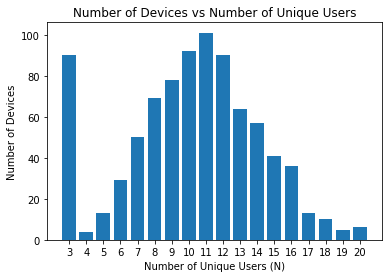

In [11]:
num_unique_users_to_device_id = fraud_data[['user_id', 'device_id']].groupby('device_id').count()
num_unique_users_to_device_id.rename(columns = {'user_id': 'num_unique_user_ids'}, inplace = True)

minimum_num_users = num_unique_users_to_device_id['num_unique_user_ids'].min()
maximum_num_users = num_unique_users_to_device_id['num_unique_user_ids'].max()

print("Minimum number of users per device id: %d" % minimum_num_users)
print("Maximum number of users per device id: %d" % maximum_num_users)

count_devices_to_num_users = []
for num_users in range(3, 21):
    num_user_condition = (num_unique_users_to_device_id['num_unique_user_ids'] == num_users)
    num = num_unique_users_to_device_id[num_user_condition].shape[0]
    count_devices_to_num_users.append(num)

plt.bar([x for x in range(3, 21)], count_devices_to_num_users)
plt.xticks([x for x in range(3, 21)])
plt.title("Number of Devices vs Number of Unique Users")
plt.xlabel("Number of Unique Users (N)")
plt.ylabel("Number of Devices")
plt.show()

The above cell simply generates a bar graph where the y-axis is the number of devices and the x-axis is the number of unique users using a device. What is interesting about this graph is that looks normally distributed where the mean number of users for a single device is about 11. For each number of unique users, we would like to know what proportion of the devices are associated to fraud. The next two cells will answer our question.

In [12]:
device_id_is_fraudulant \
= fraud_data[['device_id', 'class']].groupby(['device_id']).agg(lambda x:x.value_counts().index[0])

fraud_user_condition = device_id_is_fraudulant['class'] == 1

count_devices_associated_with_fraud      = []
count_devices_to_num_users               = []
count_devices_not_associated_with_fraud  = []

for num_users in range(3, 21):
    num_user_condition = (num_unique_users_to_device_id['num_unique_user_ids'] == num_users)
  
    num = num_unique_users_to_device_id[num_user_condition].shape[0]
    count_devices_to_num_users.append(num)
  
    num_fraud = num_unique_users_to_device_id[num_user_condition & fraud_user_condition].shape[0]  
    count_devices_associated_with_fraud.append(num_fraud)
  
    count_devices_not_associated_with_fraud.append(num - num_fraud)

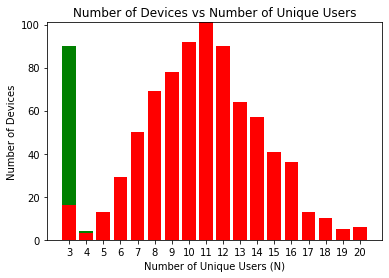

In [13]:
plt.bar([x for x in range(3, 21)], count_devices_associated_with_fraud, color = 'red')
plt.bar([x for x in range(3, 21)], count_devices_not_associated_with_fraud,
        bottom = count_devices_associated_with_fraud, color = 'green')
plt.xticks([x for x in range(3, 21)])
plt.title("Number of Devices vs Number of Unique Users")
plt.xlabel("Number of Unique Users (N)")
plt.ylabel("Number of Devices")
plt.show()

Most devices that have 3 unique users are not associated to fraudulent transactions. A possible reason could be that there is a family (eg father, mother, and single child) sharing a single device. All devices that have 5 or more unique users are associated with fraud. This means that the number of unique users on a device is an important factor in detecting fraudulant transactions. Let us look at purchase value, and see if it is also an important feature in detecting fraud.

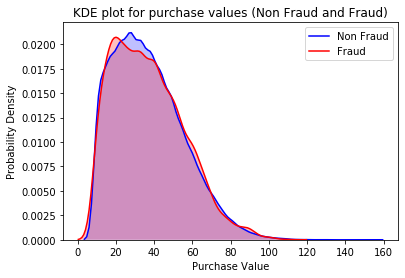

In [14]:
non_fraudulent_transactions = fraud_data[fraud_data['class'] == 0]
fraudulent_transactions     = fraud_data[fraud_data['class'] == 1]

non_fraudulent_transactions['purchase_value']
sns.kdeplot(non_fraudulent_transactions['purchase_value'], shade = True, color = 'blue', label = "Non Fraud")
sns.kdeplot(fraudulent_transactions['purchase_value'], shade = True, color = 'red', label = "Fraud")

plt.title("KDE plot for purchase values (Non Fraud and Fraud)")
plt.ylabel("Probability Density")
plt.xlabel("Purchase Value")

plt.show()

The KDE plot demonstrates that the distribution between fraudulent and non fraudulent transactions, in terms of its purchase value, is very similar with one another. Therefore, purchase value on its own will not be useful in determining fraud based on the data that we have. Lets focus more on fraudelent transactions see what tools do fraudsters use to make a transaction.

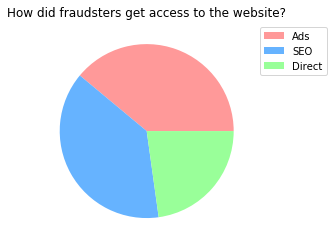

In [15]:
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(fraud_data[fraud_data['class'] == 1]['source'].value_counts(), colors = colors)
plt.title("How did fraudsters get access to the website?")
plt.legend(['Ads', 'SEO', 'Direct'], bbox_to_anchor = (1.0, 1.0))
plt.show()

Most of them got access to the website through advertisements, and search engine optimizations.

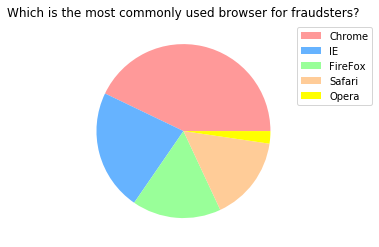

In [16]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc98', 'yellow']
plt.pie(fraud_data[fraud_data['class'] == 1]['browser'].value_counts(), colors = colors)
plt.title("Which is the most commonly used browser for fraudsters?")
plt.legend(['Chrome', 'IE', 'FireFox', 'Safari', 'Opera'], bbox_to_anchor=(1.0, 1.0))
plt.show()

Most of them use Chrome, Internet Explorer, and FireFox as their browser to access the website.

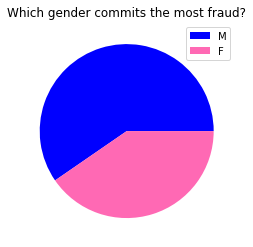

In [17]:
plt.pie(fraud_data[fraud_data['class'] == 1]['sex'].value_counts(), colors = ['blue', 'hotpink'])
plt.title("Which gender commits the most fraud?")
plt.legend(['M', 'F'])
plt.show()

Most fraudsters are male.

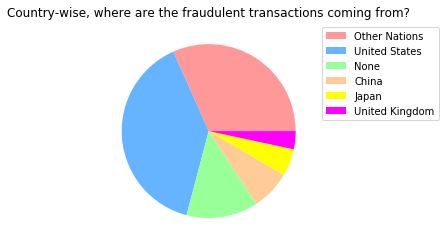

In [18]:
series = fraud_data[fraud_data['class'] == 1]['country'].value_counts()
country_to_fraud_count = pd.DataFrame(series)
dictionary = {'Other Nations': 0}

for country in country_to_fraud_count.index:
    if country_to_fraud_count.loc[country].values[0] > 450:
        dictionary[country] = country_to_fraud_count.loc[country].values[0]
    else:
        dictionary['Other Nations'] += country_to_fraud_count.loc[country].values[0]

country_to_fraud_count = pd.Series(dictionary)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc98', 'yellow', 'magenta']
plt.pie(country_to_fraud_count, colors = colors)
plt.title("Country-wise, where are the fraudulent transactions coming from?")

countries = ['Other Nations', 'United States', 'None', 'China', 'Japan', 'United Kingdom']
plt.legend(countries, bbox_to_anchor = (1.0, 1.0))
plt.show()

# Model Creation

## Preprocessing Step

As a preprocessing step, we will add the number of unique users column into our fraud_data dataframe. This number is associated to a device ID (i.e how many unique users are using a device).

In [19]:
fraud_data['num_unique_users_for_device'] = (
    fraud_data['device_id'].apply(lambda x: num_unique_users_to_device_id.loc[x])
)

fraud_data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,country,time_duration (secs),num_unique_users_for_device
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,Japan,4506682,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,United States,17944,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,United States,1,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,None,492085,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,United States,4361461,1
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,0,Canada,4240931,1
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,0,None,2177825,1
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,0,United States,4268729,1
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,0,China,3594200,1
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,0,United States,4943753,1


Filter out the fraud dataframe so that have the columns that are of most interest in detecting fraud and one hot encode all categorical variables.

In [20]:
columns_of_interest = ['num_unique_users_for_device', 'time_duration (secs)', 
                       'purchase_value', 'source','browser', 'sex', 'age', 
                       'country','class']

modified_fraud_data = fraud_data[columns_of_interest].copy()
modified_fraud_data = pd.get_dummies(modified_fraud_data)
column_list = list(modified_fraud_data)

for i in range(0,3):
    column_list[i], column_list[4] = column_list[4], column_list[i]
    
modified_fraud_data = modified_fraud_data[column_list]
modified_fraud_data.head(10)

,class,num_unique_users_for_device,time_duration (secs),age,purchase_value,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,0,1,4506682,39,34,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,17944,53,16,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,12,1,53,15,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,492085,41,44,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,4361461,45,39,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,1,4240931,18,42,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,2177825,19,11,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,4268729,34,27,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,1,3594200,43,30,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,4943753,31,62,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Next, we will use the z-score normalization for the following columns:
 * num_unique_users_for_device
 * time_duration (secs)
 * age
 * purchase_value

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = modified_fraud_data[column_list[1:]]
y = modified_fraud_data['class']

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.3)

X_val = X_val_test[0:len(X_val_test) // 2]
y_val = y_val_test[0:len(X_val_test) // 2]

X_test = X_val_test[len(X_val_test) // 2:]
y_test = y_val_test[len(X_val_test) // 2:]

normalized_columns = ['num_unique_users_for_device', 'time_duration (secs)', 'age', 'purchase_value']
scaler = StandardScaler()
scaler.fit(X_train[normalized_columns])

X_train_normalized = scaler.transform(X_train[normalized_columns])
X_val_normalized   = scaler.transform(X_val[normalized_columns])
X_test_normalized  = scaler.transform(X_test[normalized_columns])

X_train_ohe = np.array(X_train[column_list[5:]])
X_val_ohe   = np.array(X_val[column_list[5:]])
X_test_ohe  = np.array(X_test[column_list[5:]])

X_train_modified = np.hstack((X_train_normalized, X_train_ohe))
X_val_modified   = np.hstack((X_val_normalized, X_val_ohe))
X_test_modified  = np.hstack((X_test_normalized, X_test_ohe))

X_train = pd.DataFrame(X_train_modified, columns = column_list[1:])
X_val   = pd.DataFrame(X_val_modified, columns = column_list[1:])
X_test  = pd.DataFrame(X_test_modified, columns = column_list[1:])

## Logistic Regression

The model will chose to identify fraudulant transactions is the logistic regresison model, since we can interpret the model based on the weights. We will apply l1 regularization to mitigate features that do not contribute to the model.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, roc_auc_score

model = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 5)
model.fit(X_train, y_train)
y_predict = model.predict(X_val)

In [23]:
print("Validation Results")
print("-------------")
print("Accurcay:    %f" %(accuracy_score(y_val, y_predict)))
print("Recall:      %f" %(recall_score(y_val, y_predict)))
print("F1 Score:    %f" %(f1_score(y_val, y_predict)))
print("Precision:   %f" %(precision_score(y_val, y_predict)))
print("AUC score:   %f" %(roc_auc_score(y_val, y_predict)))

Validation Results
-------------
Accurcay:    0.950589
Recall:      0.520961
F1 Score:    0.663866
Precision:   0.914806
AUC score:   0.757974


After doing hyperparameter tuning, we determine that C = 5 gives the best results on our validation set. By looking at the precision score, we conclude that this model is very good at identifying a fraudulant transaction if it suspects that a transaction is fraudulant. However, the recall score indicates that the model can identify half of all fraudulant transactions.

In [24]:
y_predict = model.predict(X_test)

print("Test Results")
print("-------------")
print("Accurcay:   %f"  %(accuracy_score(y_test, y_predict)))
print("Recall:     %f"  %(recall_score(y_test, y_predict)))
print("F1 Score:   %f"  %(f1_score(y_test, y_predict)))
print("Precision:  %f"  %(precision_score(y_test, y_predict)))
print("AUC score:  %f"  %(roc_auc_score(y_test, y_predict)))

Test Results
-------------
Accurcay:   0.952707
Recall:     0.541368
F1 Score:   0.678657
Precision:  0.909237
AUC score:  0.767938


Next, we will look at the weights to determine which features are important for finding fraudulant transactions.

In [37]:
#Examine the weights in the logistic regression model (First 4)
predictors = column_list[1:]
feature_ranking = pd.DataFrame(
    {
        'Features': [predictors[i] for i in range(len(model.coef_[0, :]))],
        'Absolute Value Weight': [abs(weight) for weight in model.coef_[0, :]],
        'Weight': [weight for weight in model.coef_[0, :]]
    }
)
feature_ranking.head(4)

,Features,Absolute Value Weight,Weight
0,num_unique_users_for_device,1.446914,1.446914
1,time_duration (secs),0.153675,-0.153675
2,age,0.004644,-0.004644
3,purchase_value,0.004243,0.004243


If we look at the four features from the above table, the number of unique users is an important feature for determining fraud. To know how important is this feature when looking at fraud, it turns out to be one of the top 5 features

In [42]:
feature_ranking.sort_values(by = ['Weight'], ascending = False).head(5)

,Features,Absolute Value Weight,Weight
181,country_Turkmenistan,3.953373,3.953373
188,country_Uzbekistan,2.017078,2.017078
14,country_Afghanistan,1.631331,1.631331
116,country_Malawi,1.580571,1.580571
0,num_unique_users_for_device,1.446914,1.446914
